## HW 1 - Designing Blockchain

Group 3: Shufeng Li, Wenlin Ye, Yifei Yin  
Github link: 记得弄一个

In [1]:
import hashlib as hasher
import random as rand
import time
import datetime as date
import ipyparallel as ipp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. Blockchain Data Structure

In [2]:
class Block: 
    def __init__(self, index, timestamp, data, previous_hash, nonce = 0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.previous_hash = previous_hash
        self.hash = self.hash_block()
    
    def hash_block(self):
        sha = hasher.sha256()
        block_hash = (str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash) + str(self.nonce))
        block_hash = block_hash.encode("utf-8")
        sha.update(block_hash)
        return sha.hexdigest()

In [5]:
block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1
new_block = Block(index, block_time, data, previous_hash)
print(new_block.hash)

260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5


In [6]:
# Test Q1
def block_validation(index, block_time, data, previous_hash):
    new_block = Block(index, block_time, data, previous_hash)
    check_string = '260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5'
    print_statement = "This is a valid Block" if str(
        new_block.hash) == check_string else "Please Check your work, this is incorrect."
    print(print_statement)

block_validation(index, block_time, data, previous_hash)


This is a valid Block


### 2. Creating a chain out of single blocks

In [7]:
# create genesis block w/ current time & generic data
def create_genesis_block(): 
    return Block(0, date.datetime.now(), "Genesis Block", "0")

# create the next block given the last block on the chain you want to mine
def next_block(last_block, nonce = 0): 
    this_index = last_block.index + 1
    this_timestamp = date.datetime.now()
    this_data = "Hey! I'm block " + str(this_index)
    this_prevhash = last_block.hash
    return Block(this_index, this_timestamp, this_data, this_prevhash)

In [8]:
# Test Q2
def genesis_validation(genesis_block):
    block_1 = next_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Hey! I'm block 1" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("Valid Genesis block")
    else:
        print("Check the code, not a valid genesis block:(")

genesis_block = create_genesis_block()
genesis_validation(genesis_block)


Valid Genesis block


### 3. Generating a complete Blockchain

In [17]:
# create blockchain + genesis block
blockchain= [create_genesis_block()]

# create initial reference to previous block which points to the genesis block
previous_block = blockchain[0]

# number of blocks we want in the bc after genesis block
num_blocks = 5

def complete_chain(num_blocks, blockchain, previous_block):
    for i in range(0, num_blocks):
        block_to_add = next_block(previous_block)
        blockchain.append(block_to_add)
        previous_block = block_to_add

        print(("the block #{} is added to the blockchain".format(block_to_add.index)))
        print("Hash : {}\n".format(block_to_add.hash))

complete_chain(num_blocks, blockchain, previous_block)


the block #1 is added to the blockchain
Hash : 439ea811834cc90f66fe015e6779b342d3d7345334c354b8cef8dd504cc5104f

the block #2 is added to the blockchain
Hash : 3887e64ef2d4a2cc7314b11241e9398fa59b0830928c2dbb429d76cc3ef8989a

the block #3 is added to the blockchain
Hash : 27a7bc9ba7e82782b760f5a1bb148cf351f0f9c4c66f972050459d14ae0cc965

the block #4 is added to the blockchain
Hash : 6b21eaee95e80bbacf18f89e1b5244cc5d9a8e89627b4333a589c32bfe7aa98f

the block #5 is added to the blockchain
Hash : 5ef209d920db7e23fd8fbd273c0af8af424603ee9f32dd6bbb87484004fd0aed



In [18]:
# Test Q3
def test_question_3(blockchain, num_blocks): 
    correct = True
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1): 
        if blockchain[i+1].previous_hash != blockchain[i].hash:
            correct = False
            break

    print_statement = "PASSED! Move on to the next part." if correct else "FAILED! Try again."
    print(print_statement)

test_question_3(blockchain, num_blocks)


PASSED! Move on to the next part.


### 4. Nonce and Difficulty


In [21]:
def generate_nonce(length =20): 
    return "".join([str(rand.randint(0,9)) for i in range(length)])

def generate_difficulty_bound(difficulty =1): 
    diff_str = ""
    for i in range(difficulty): 
        diff_str += "0"
    for i in range(64 - difficulty): 
        diff_str += "F"
    diff_str = "0x" + diff_str #specify: hex representation
    #print(diff_str)
    return(int(diff_str, 16)) #specify: want integer of base 10

In [23]:
# given previous block & difficulty metic, find a nonce that results in a lower hash value\
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time()
    new_block = next_block(last_block)
    hashes_tried = 1
    while int(new_block.hash, 16) > difficulty_bound: 
        nonce = generate_nonce(nonce_length)
        new_block = Block(new_block.index, new_block.timestamp, new_block.data, new_block.previous_hash, nonce)
        hashes_tried += 1
    time_taken = time.process_time() - start
    return(time_taken, hashes_tried, new_block)


In [ ]:
# Q4 Test
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 20
difficulty = 3
nonce_length = 10


def blockchain_proof(blockchain, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
        if int(blockchain[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)
    blockchain_proof(blockchain, num_blocks)




### 5. Distributed Network

In [64]:
# Naive miner class that races with other miners to see who can get a certain number of blocks first

class MinerNodeNaive:
    def __init__(self, name, compute):
        self.name = name
        self.compute = compute

    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = date.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))


In [65]:
# Initiate multiple miners on network

miner_1 = MinerNodeNaive("Miner 1", 8)
miner_2 = MinerNodeNaive("Miner 2", 6)
miner_3 = MinerNodeNaive("Miner 3", 9)
miner_4 = MinerNodeNaive("Miner 4", 3)
miner_5 = MinerNodeNaive("Miner 5", 1)
miners = [miner_1, miner_2, miner_3, miner_4, miner_5]


In [66]:
def create_compute_simulation(miner_array): 
    compute_array = []
    for miner in miner_array:
        for i in range(miner.compute):
            compute_array.append(miner.name)
    return compute_array

compute_simulation_array = create_compute_simulation(miner_array)
rand.shuffle(compute_simulation_array)

In [67]:
chain_length = 20
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
chain_difficulty = [rand.randint(2, 6) for i in range(chain_length)]
print(chain_difficulty)

[5, 5, 5, 3, 5, 5, 3, 6, 3, 3, 3, 5, 4, 5, 5, 2, 5, 4, 4, 3]


In [68]:
for i in range(len(chain_difficulty)): 
    while len(blockchain_distributed) < i + 2 : 
        next_miner_str = rand.sample(compute_simulation_array, 1)[0]
        next_miner = miner_2
        for miner in miners: 
            if next_miner_str == miner.name:
                next_miner = miner
        next_miner.try_hash(chain_difficulty[1], blockchain_distributed)



Block #1 has been added to the blockchain!
Block found by: Miner 2
Hash: ba35449cb484ee2277f217a551321aab93d5116661287f773ced6f02af956608

Block #2 has been added to the blockchain!
Block found by: Miner 2
Hash: 0e0e517d993fe50410b342993e11d87e4f892e3aade64f574b06510fb326c2c3

Block #3 has been added to the blockchain!
Block found by: Miner 3
Hash: be71028481d64a4b95077190adde7b1ae1fa78f1ef2edf38a3b875f584f61bbb

Block #4 has been added to the blockchain!
Block found by: Miner 1
Hash: 66b6f83b3b33f15145d9d9a4ac64dfe978d4a847fdac95db6332ae42817a88ba

Block #5 has been added to the blockchain!
Block found by: Miner 3
Hash: a7a578859b1dc8a0eea8176b853b1f8f1f18875f309f716cf00f3597a3973259

Block #6 has been added to the blockchain!
Block found by: Miner 5
Hash: a88edeb4e684047936745610269c24f8b50b8e2408882d8e5fc5c48a813431d5

Block #7 has been added to the blockchain!
Block found by: Miner 1
Hash: 77a31445f21d391e824131a3cbf39491b54cf05d48ccb117304ba7269a038424

Block #8 has been added to 

### 6. Analytics on the Blockchain Data


In [73]:
num_blocks = 10
blockchain = [create_genesis_block()]
previous_block = blockchain[0]

# diff types of difficulty to analyze
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4

nonce_length = 20

hash_array_0, time_array_0 = create_pow_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_pow_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_pow_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_pow_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("Difficulty level: {} complete".format(difficulty_3))



Difficulty level: 1 complete
Difficulty level: 2 complete
Difficulty level: 3 complete
Difficulty level: 4 complete


In [74]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3)]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [3.0999999999892225e-05, 9.999999999621423e-06, 8.999999998593466e-06, 8.999999998593466e-06, 8.000000001118224e-06, 8.000000001118224e-06, 7.99999999756551e-06, 8.000000001118224e-06, 8.000000001118224e-06, 8.000000001118224e-06]


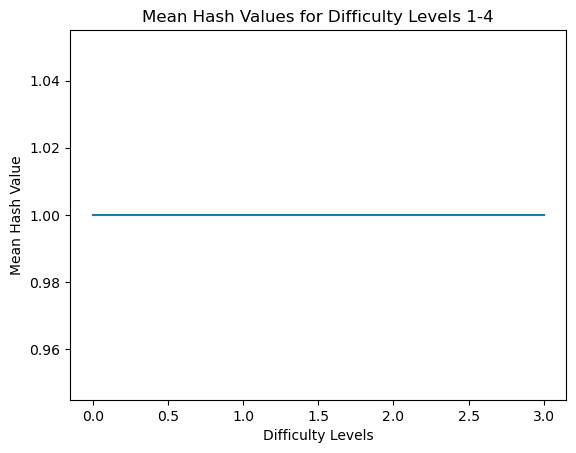

In [75]:
plt.plot(mean_arr_hash)
plt.xlabel("Difficulty Levels")
plt.ylabel("Mean Hash Value")
plt.title('Mean Hash Values for Difficulty Levels 1-4')
plt.show()
